**Q1. How can you create a Bokeh plot using Python code?**

To create a Bokeh plot using Python, we need to install the Bokeh library if we haven't already. We can install it via pip:

In [1]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


**Below is an example of how we can create a Bokeh plot using python code:**

In [2]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

from bokeh.plotting import figure , output_file, show

x=[1,2,3,4,5]
y=[9,8,7,6,5]

output_file('test.html')

p1 = figure(title = 'test line', x_axis_label='X-axis', y_axis_label='Y-axis')
p1.line(x , y)
show(p1)

Loading BokehJS ...

**Q2. What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.**

In Bokeh, glyphs are visual markers or shapes used to represent data points on a plot. These glyphs can be circles, squares, lines, patches, bars, etc., and they allow us to visually represent data in different ways.

To add glyphs to a Bokeh plot, we create a plot using the figure function, and then use specific glyph methods provided by Bokeh (like circle, line, square, etc.) to add the desired glyphs to the plot.

Below is an example showing how to add glyphs (circles and a line) to a Bokeh plot:

In [3]:
from bokeh.plotting import figure, output_file, show


x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

output_file("glyphs_example.html")

p = figure(title="Glyphs Example", x_axis_label='X-axis', y_axis_label='Y-axis')

# Add circles as glyphs to the plot
p.circle(x, y, size=10, color='navy', alpha=0.5)

# Add a line as a glyph to the plot
p.line(x, y, line_width=2, color='red') 

show(p)


**Q3. How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?**

To customize the appearance of a Bokeh plot, including the axes, title, and legend, we can use various properties and methods provided by the Bokeh library.

In [4]:
from bokeh.plotting import figure, output_file, show

x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

output_file("customized_plot.html")

p = figure(title="Customized Bokeh Plot", x_axis_label='X-axis', y_axis_label='Y-axis')

# Add circles as glyphs to the plot
p.circle(x, y, size=10, color='blue', alpha=0.7, legend_label="Circles")  # Customize circle glyphs

# Change the appearance of the axes
p.xaxis.axis_label_text_color = "green"  # X-axis label text color
p.yaxis.axis_label_text_font_style = "italic"  # Y-axis label text font style
p.xaxis.major_label_text_color = "orange"  # X-axis major tick label text color

# Customize the plot title
p.title.text_color = "red"  # Title text color
p.title.text_font = "times"  # Title font
p.title.text_font_size = "16pt"  # Title font size

# Customize the legend
p.legend.location = "top_left"  # Position of the legend
p.legend.title = "Legend"  # Legend title
p.legend.label_text_font = "helvetica"  # Legend label font
p.legend.label_text_color = "purple"  # Legend label color

# Show the plot
show(p)


Glyphs (circles) are customized with properties like size, color, and alpha.

Axis labels and tick labels are modified using properties like axis_label_text_color and major_label_text_color.

Title properties such as text_color, text_font, and text_font_size are adjusted.

Legend properties like location, title, label_text_font, and label_text_color are customized.

**Q4. What is a Bokeh server, and how can you use it to create interactive plots that can be updated in real time?**

Bokeh server is a component of the Bokeh library that allows us to build and serve interactive data visualizations that can be updated in real time. It enables the creation of web applications with dynamic, interactive plots where users can interact with the plot elements and the underlying data.

To create interactive plots using Bokeh server, follow are the steps:

1. Create the plot(s) and add widgets that will enable user interactions.

2. Define Python functions (callbacks) that specify what happens when the user interacts with the widgets. These callbacks modify the plot based on the user's input.

3. Wrap the plot and the associated callbacks in a Bokeh application.

4. Launch the Bokeh server, which will serve the application and make it accessible via a web browser.

Below is an example showing how we can create a Bokeh server application that updates a plot based on a slider widget:

In [16]:
from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import Slider
from bokeh.plotting import figure

# Create initial data
x = [x/10 for x in range(0, 100)]
y = [i**2 for i in x]

# Create a new plot
plot = figure(title="Interactive Plot")
plot.line(x, y, line_width=2)

# Create a slider widget
slider = Slider(start=0, end=10, value=1, step=1, title="Multiplier")

# Define callback function
def update(attr, old, new):
    multiplier = slider.value
    updated_y = [i ** 2 * multiplier for i in x]
    plot.line(x, updated_y, line_width=2)

# Attach callback to slider's value attribute
slider.on_change('value', update)

# Create layout
layout = column(slider, plot)

# Add layout to current document
curdoc().add_root(layout)


To run this code as a Bokeh server application:

1. Save the code in a file, e.g., example_plot.py.
2. Open a terminal or command prompt.
3. Navigate to the directory containing the file.
4. Run the Bokeh server with the command: "bokeh serve --show example_plot.py".

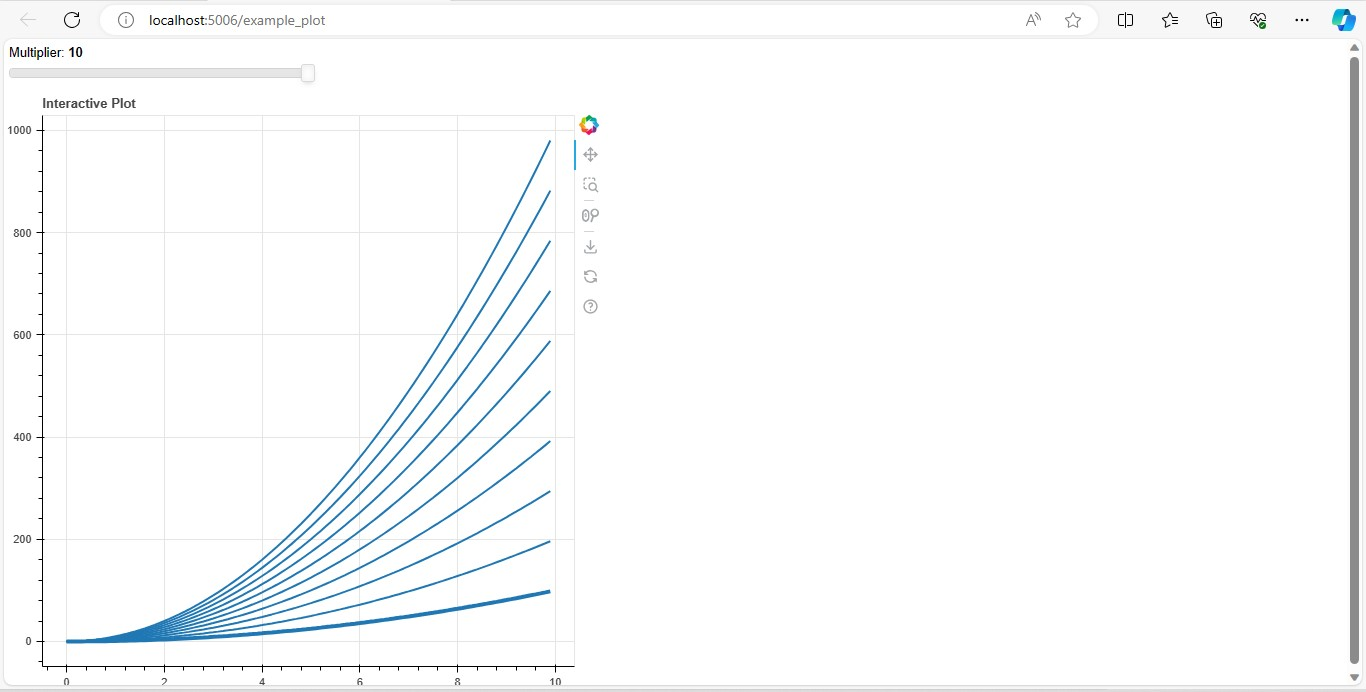

In [8]:
from IPython.display import Image
Image(filename="./Q4_Bokeh_Server_Application_Interactive_RealTimeUpdate.jpg")##Image of the Output.

**Q5. How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?**

To embed a Bokeh plot into a web page or dashboard using Flask, we need to create a Flask application and serve the Bokeh plot within a route or template. 
Below is an example on how we can achieve this:
1. Ensure we have Flask and Bokeh installed. If not, we can install them using pip: "pip install flask bokeh".
2. Create a Python file, e.g., app.py, to set up a basic Flask application.

In [5]:
#Code written in app.py file
from flask import Flask, render_template
from bokeh.plotting import figure
from bokeh.embed import components
from bokeh.resources import CDN

app = Flask(__name__)

@app.route('/')
def index():
    # Create Bokeh plot
    plot = figure(title='Bokeh Plot', x_axis_label='X-axis', y_axis_label='Y-axis')
    plot.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)

    # Get Bokeh components (script and div)
    script, div = components(plot, CDN)

    # Render the template and pass Bokeh components
    return render_template('index.html', script=script, div=div)

if __name__ == '__main__':
    app.run(debug=True)


GlyphRenderer(id='p2159', ...)

3. Create a folder named templates in the same directory as our Python file (if it doesn't exist) and create an HTML template file, e.g., index.html, to render the Bokeh plot.

In [ ]:
#Code written index.html
"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Bokeh Plot in Flask</title>
    <script src="https://cdn.bokeh.org/bokeh/release/bokeh-3.3.2.min.js"
        crossorigin="anonymous"></script>
    <script src="https://cdn.bokeh.org/bokeh/release/bokeh-widgets-3.3.2.min.js"
        crossorigin="anonymous"></script>
    <script src="https://cdn.bokeh.org/bokeh/release/bokeh-tables-3.3.2.min.js"
        crossorigin="anonymous"></script>
    <script src="https://cdn.bokeh.org/bokeh/release/bokeh-gl-3.3.2.min.js"
        crossorigin="anonymous"></script>
    <script src="https://cdn.bokeh.org/bokeh/release/bokeh-mathjax-3.3.2.min.js"
        crossorigin="anonymous"></script>
    <!-- Include Bokeh JS and CSS resources -->
    {{ script | safe }}
</head>
<body>
    <h1>Bokeh Plot Embedded in Flask</h1>
    <!-- Embed the Bokeh plot -->
    {{ div | safe }}
</body>
</html>
"""

4. Run the Flask application by executing "python app.py" in the terminal or command prompt, from the diractory cantaining app.py file.

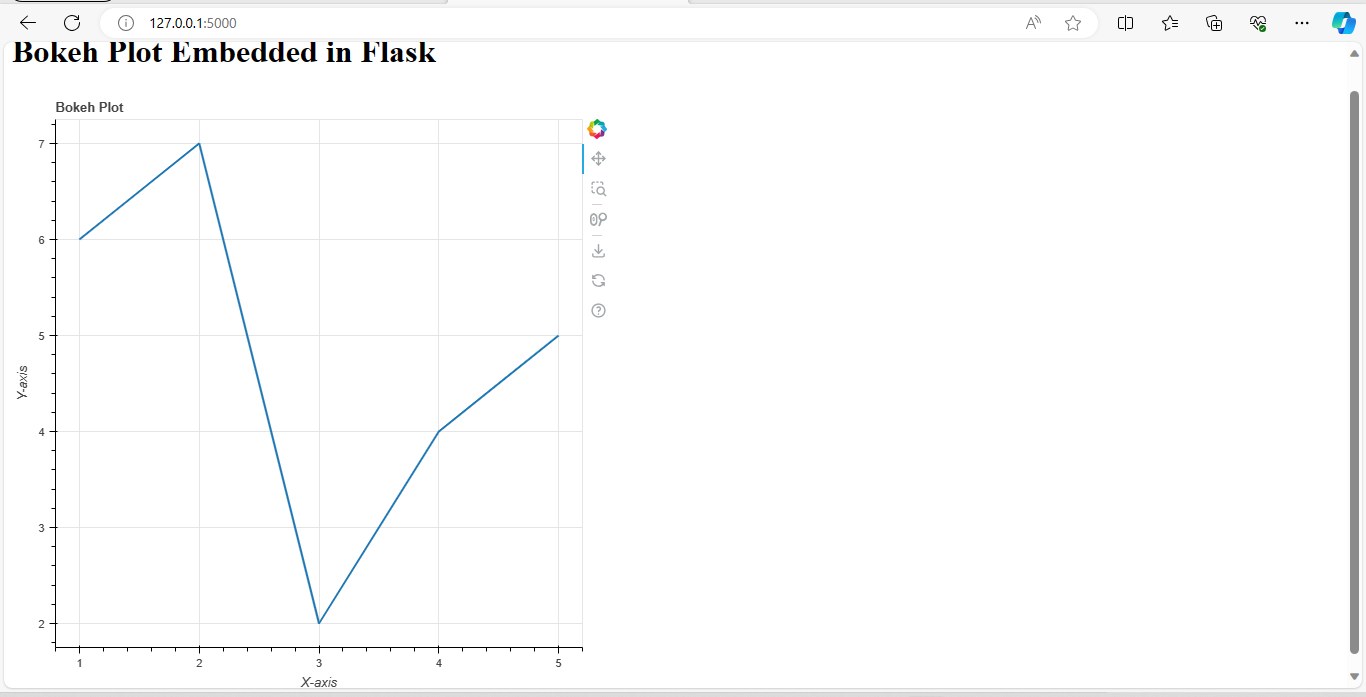

In [9]:
from IPython.display import Image
Image(filename="./Q5_Bokeh_Flask_Application.png")##Image of the Output